In [1]:

# Import dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats
import numpy as np 
import tensorflow as tf 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split



/Users/francisrey/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/francisrey/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/francisrey/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/

In [2]:
############################ Data Selection ##########################


In [3]:
# Import Dataset
charity_df = pd.read_csv("Resources/charity_data.csv")
charity_df.head(10)


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,10556855,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,10558440,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,10566033,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,10570430,ARAMCO BRATS INC,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,10571689,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [4]:
# Check for null values
charity_df.isnull().sum()


EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [5]:
charity_start =charity_df.copy()
# Filters out non-feature variables from dataset
charity_noName_df = charity_start.drop(columns=['NAME','EIN'])
charity_noName_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Data types
charity_noName_df.dtypes


APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [7]:
# Remove inactivite companies (status is 0)
#charity_df = charity_df[charity_df.STATUS == 1]


In [8]:

###################### Data Preprocess PART  ###################

# Transform categorical variables into numerical values


In [9]:
# Generate a name list of categorical variables 
charity_category = charity_noName_df.dtypes[charity_noName_df.dtypes == 'object'].index.tolist()

# check the unique values in each columns for bucketing (APPLICATION_TYPE has 17, CLASSIFICATION: 71)
charity_noName_df[charity_category].nunique()



APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [10]:
# Categorical binning for APPLICTION_TYPE
app_counts = charity_noName_df.APPLICATION_TYPE.value_counts()
replace_type = list(app_counts[app_counts<500].index)
for application in replace_type:
    charity_noName_df.APPLICATION_TYPE = charity_noName_df.APPLICATION_TYPE.replace(application,"Others")
charity_noName_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [11]:
charity_noName_df['APPLICATION_TYPE'].value_counts()


T3        27037
T4         1542
T6         1216
T5         1173
T19        1065
T8          737
T7          725
T10         528
Others      276
Name: APPLICATION_TYPE, dtype: int64

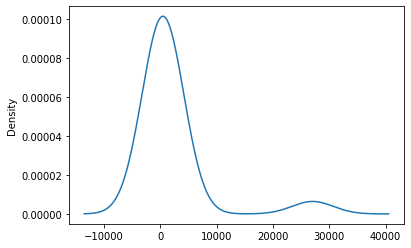

In [12]:
# Plot the distribution
app_counts.plot.density()


In [13]:
# Categorical binning for CLASSIFICATION
classify_counts = charity_noName_df.CLASSIFICATION.value_counts()
replace_classification = list(classify_counts[classify_counts<1000].index)
for classification in replace_classification:
    charity_noName_df.CLASSIFICATION = charity_noName_df.CLASSIFICATION.replace(classification,"Others")
charity_noName_df.head()



,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [14]:
charity_noName_df['CLASSIFICATION'].value_counts()


C1000     17326
C2000      6074
C1200      4837
Others     2261
C3000      1918
C2100      1883
Name: CLASSIFICATION, dtype: int64

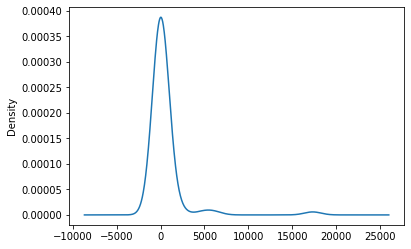

In [15]:
classify_counts.plot.density()


In [16]:
# double check every categorical variables doesn't exceed 10 unique values
charity_noName_df[charity_category].nunique()


APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [17]:
#use oneHot encode method to convert categorcal variables into several numerical variables
enc = OneHotEncoder(sparse = False) # return array not sparse matrix

# create a encode new DataFrame only contains encoded categorical variables
encode_df = pd.DataFrame(enc.fit_transform(charity_noName_df[charity_category]))
encode_df.columns = enc.get_feature_names(charity_category)
encode_df.head()


,APPLICATION_TYPE_Others,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# merge back to orginal df and drop original unencoded columns
encoded_df  = charity_noName_df.merge(encode_df, left_index = True, right_index = True)
encoded_df.head()



,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
############################  Data Selection  ######################
# Redece outliers and noisy data points for specific variables


In [20]:
Q1 = encoded_df.ASK_AMT.quantile(0.25)
Q3 = encoded_df.ASK_AMT.quantile(0.75)
IQR = Q3 - Q1


In [21]:
boo_ASK = (encoded_df.ASK_AMT < (Q1 - 150 * IQR)) |(encoded_df.ASK_AMT > (Q3 + 150 * IQR))
IQR_outliers = encoded_df.ASK_AMT[boo_ASK == True]
len(IQR_outliers)


2434

In [22]:
len(encoded_df)

34299

In [23]:
Zscore = np.abs(stats.zscore(encoded_df.ASK_AMT) <= 3)

outliers = Zscore[Zscore == False]

len(outliers)

53

In [24]:
# encoded_df = encoded_df[(np.abs(stats.zscore(encoded_df.ASK_AMT)) <= 3)]
# len(encoded_df)

In [25]:
# focus on numerical variable: ASK_AMT 
# encoded_charity_df.ASK_AMT.describe()


In [26]:
encoded_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Others',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Others', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME

In [27]:
len(encoded_df.columns)

51

In [28]:
y = encoded_df['IS_SUCCESSFUL'].values


In [29]:
# encoded_charity_df.ASK_AMT.plot.box()



In [30]:
#########################    Data Preprocess  #####################

# Determine features (X) and target column (y) and split into training, testing data

In [31]:
#Find the parameter that affects the prediction

X = encoded_df.drop(columns=['IS_SUCCESSFUL',
#                              'APPLICATION_TYPE',
#                              'AFFILIATION',
#                              'USE_CASE',
#                              'CLASSIFICATION',
#                              'ORGANIZATION',
#                              'INCOME_AMT',
#                              'SPECIAL_CONSIDERATIONS'
                             
#         'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
#         'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
#         'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
                             
#         'AFFILIATION_CompanySponsored', 
#         'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
#         'AFFILIATION_Regional',

#         'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev'
                             
#         'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
#         'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
#         'CLASSIFICATION_Others', 
                                     
#         'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
#         'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 
                             
#         'INCOME_AMT_0',
#         'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
#         'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
#         'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
                             
#         'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'
                             
       ])


# X = encoded_charity_df.drop(columns=[ 'IS_SUCCESSFUL'
# ])

In [32]:
len(X.columns)


50

In [33]:
X.columns


Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'APPLICATION_TYPE_Others', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Others',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       '

In [34]:
X.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,APPLICATION_TYPE_Others,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:

X['APPLICATION_TYPE'] = LabelEncoder().fit_transform(X['APPLICATION_TYPE'])

X['AFFILIATION'] = LabelEncoder().fit_transform(X['AFFILIATION'])

X['CLASSIFICATION'] = LabelEncoder().fit_transform(X['CLASSIFICATION'])

X['USE_CASE'] = LabelEncoder().fit_transform(X['USE_CASE'])

X['ORGANIZATION'] = LabelEncoder().fit_transform(X['ORGANIZATION'])

X['SPECIAL_CONSIDERATIONS'] = LabelEncoder().fit_transform(X['SPECIAL_CONSIDERATIONS'])

X['INCOME_AMT'] = LabelEncoder().fit_transform(X['INCOME_AMT'])



In [37]:
X = X.dropna()


In [38]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [39]:

from keras.utils import to_categorical



Using TensorFlow backend.


In [40]:
y_test_hot = to_categorical(y_test)
y_train_hot = to_categorical(y_train)


In [41]:
#########################  Data Preprocess   ##################


In [42]:
# determine number of neurons in each layers
num_input = len(X_train_scaled[0])

num_first = 100
num_second = 10
num_third = 5

# build a Sequential model as a base
nn_model = tf.keras.models.Sequential()

# build Dense layer for input and first hidden layer
nn_model.add(tf.keras.layers.Dense(units=num_first, input_dim = num_input,
                                    activation ='relu'))
nn_model.add(tf.keras.layers.LeakyReLU(alpha=0.1)) 


nn_model.add(tf.keras.layers.Dense(units = num_second, activation='relu'))
nn_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))

# # nn_model.add.add(tf.keras.layers.Flatten())
# nn_model.add(tf.keras.layers.Dense(units = num_third, activation='relu'))
# nn_model.add(tf.keras.layers.LeakyReLU(alpha=0.1))


# nn_model.add(tf.keras.layers.LeakyReLU(alpha=0.1)) 
nn_model.add(tf.keras.layers.Dense(units = 2, activation='relu'))

nn_model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               5100      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 6,132
Trainable params: 6,132
Non-trainable params: 0
_________________________________________________________________


In [43]:
batch = num_input
batch


50

In [44]:
# config setting
nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam',
                metrics = ['accuracy'])



In [45]:
# Train the model 
# fit_model = nn_model.fit(X_train, y_train_hot, batch_size=batch,epochs=30,verbose=1,validation_data=(X_test, y_test_hot))

fit_model = nn_model.fit(X_train_scaled, y_train_hot, epochs=30) 
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test_hot,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")




Instructions for updating:
Use tf.cast instead.
Epoch 1/30
25724/25724 [==============================] - 2s 81us/sample - loss: 1.1463 - acc: 0.6930
Epoch 2/30
25724/25724 [==============================] - 2s 72us/sample - loss: 0.8440 - acc: 0.6896
Epoch 3/30
25724/25724 [==============================] - 2s 82us/sample - loss: 0.7791 - acc: 0.7038
Epoch 4/30
25724/25724 [==============================] - 2s 97us/sample - loss: 0.8096 - acc: 0.7005
Epoch 5/30
25724/25724 [==============================] - 2s 68us/sample - loss: 0.8357 - acc: 0.7105
Epoch 6/30
25724/25724 [==============================] - 2s 68us/sample - loss: 0.8553 - acc: 0.7101
Epoch 7/30
25724/25724 [==============================] - 2s 66us/sample - loss: 0.7945 - acc: 0.7105
Epoch 8/30
25724/25724 [==============================] - 2s 71us/sample - loss: 0.7335 - acc: 0.7165
Epoch 9/30
25724/25724 [==============================] - 2s 70us/sample - loss: 0.7277 - acc: 0.7185
Epoch 10/30
25724/25724 [=========